In [1]:
import numpy as np
import pandas as pd
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as ex

In [2]:
df=prep.explore_df()

In [3]:
df.head()

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
0,TAAifFP590,Root,45.00,60.00,2018.0,2.0,4.0,60.0,90.0,10.0,412,4.059395,11,3.818182,3.636364,1,game,6
1,yqR4PtpO8X,Scythe,54.39,90.00,2016.0,1.0,5.0,90.0,120.0,14.0,763,4.213439,17,3.117647,3.235294,2,game,9
2,5H5JS0KLzK,Wingspan,50.00,60.00,2019.0,1.0,5.0,40.0,70.0,10.0,589,4.162919,12,2.500000,2.833333,3,game,11
3,RLlDWHh7hR,Gloomhaven,105.97,140.00,2017.0,1.0,4.0,60.0,150.0,12.0,491,4.351614,10,3.900000,3.600000,4,game,5
4,fDn9rQjH9O,Terraforming Mars,51.99,69.95,2016.0,1.0,5.0,90.0,120.0,12.0,713,4.146214,10,3.000000,3.300000,5,game,3


In [4]:
m=pd.read_csv('mechanic_df')

In [5]:
m.head()

,mechanics
0,Action / Movement Programming
1,Action Queue
2,Area Control
3,Dice Rolling
4,Engine Building


# first look at the mechanics to see which mechanics are most popular

In [6]:
m.value_counts().head(20)

mechanics                    
Hand Management                  375
Dice Rolling                     262
Variable Player Powers           257
Set Collection                   247
Card Drafting                    228
Cooperative Play                 145
Tile Placement                   143
Area Control                     124
Worker Placement                 123
Modular Board                    121
Grid Movement                     89
Deck Building                     87
Press Your Luck                   75
Network and Route Building        73
Area Majority/ Influence          72
Solo / Solitaire Game             71
Action Point Allowance System     69
Take That                         66
Area Movement                     66
Point to Point Movement           62
dtype: int64

Hand managment and dice rolling seem obvious to be the top two as they are necessary to play and progress a game. Cards are often a staple in games, so set collection and card drafting are also not suprising. However the drafting aspect is interesting. Many game have a random drawing mechanic compared to a draft mechanic to the cards.  

I suprises me that area control is rated so high but area movement and area majority/influence are much lower. Unless only one of these latter two are associated with area control games. Which if you combined all "area" based mechanics, it would be one of the highest mechanics.

In [7]:
df['rank'].value_counts().shape

(935,)

In [8]:
df.shape

(995, 18)

## top 100 games (~10%) will be considered 'high rated'

In [9]:
df['rank'].dtype

dtype('int64')

In [10]:
for i, r in df.iterrows():
    if r['rank'] <= 100:
        df.loc[i, 'rank'] = 1
    else:
        df.loc[i, 'rank'] = 0

In [11]:
df['rank'].value_counts()

0    892
1    103
Name: rank, dtype: int64

In [12]:
df.head(5)

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
0,TAAifFP590,Root,45.00,60.00,2018.0,2.0,4.0,60.0,90.0,10.0,412,4.059395,11,3.818182,3.636364,1,game,6
1,yqR4PtpO8X,Scythe,54.39,90.00,2016.0,1.0,5.0,90.0,120.0,14.0,763,4.213439,17,3.117647,3.235294,1,game,9
2,5H5JS0KLzK,Wingspan,50.00,60.00,2019.0,1.0,5.0,40.0,70.0,10.0,589,4.162919,12,2.500000,2.833333,1,game,11
3,RLlDWHh7hR,Gloomhaven,105.97,140.00,2017.0,1.0,4.0,60.0,150.0,12.0,491,4.351614,10,3.900000,3.600000,1,game,5
4,fDn9rQjH9O,Terraforming Mars,51.99,69.95,2016.0,1.0,5.0,90.0,120.0,12.0,713,4.146214,10,3.000000,3.300000,1,game,3


In [13]:
df.tail(5)

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
995,utvG6nvnq5,Snake Oil,19.99,19.95,2010.0,3.0,10.0,20.0,30.0,10.0,67,3.130597,0,0.0,0.0,0,game,0
996,2LJTEmU5LY,Bob Ross the Art of Chill,24.46,31.99,2017.0,2.0,4.0,30.0,30.0,12.0,64,3.370312,1,3.0,2.0,0,game,0
997,JBQPZrO0yC,A Study in Emerald,149.95,0.00,2013.0,2.0,5.0,90.0,90.0,13.0,30,3.433333,0,0.0,0.0,0,game,0
998,kz2pqBlpT4,Mansions of Madness,5.89,99.95,2011.0,2.0,5.0,120.0,180.0,13.0,68,3.252941,0,0.0,0.0,0,game,4
999,kgs5t2m5kv,Kokoro: Avenue of the Kodama,13.39,19.99,2017.0,2.0,8.0,30.0,45.0,14.0,58,3.312069,0,0.0,0.0,0,game,0


## Encode the 'type' column

In [14]:
df['type'].value_counts()

game         875
expansion    119
accessory      1
Name: type, dtype: int64

In [15]:
for i, t in df.iterrows():
    if t['type'] == 'game':
        df.loc[i, 'type'] = 0
    elif t['type'] == 'expansion':
        df.loc[i, 'type'] = 1
    else:
        df.loc[i, 'type'] = 2

In [16]:
df['type'].value_counts()

0    875
1    119
2      1
Name: type, dtype: int64

In [17]:
df.drop(columns=['id'], inplace=True)

## Split data

In [18]:
train, val, test= ex.tts(df, 'rank')

In [19]:
train.shape, val.shape, test.shape

((716, 17), (179, 17), (100, 17))

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the price of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average price of higher rated games and other games</dd>
        <dd>- $H_a$: The average price of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [20]:
alpha=.05

In [21]:
hirank=train[train['rank']==1]['price']

In [22]:
train[train['rank']==1]['price'].var()

1085.8798928421054

<AxesSubplot:xlabel='price', ylabel='Count'>

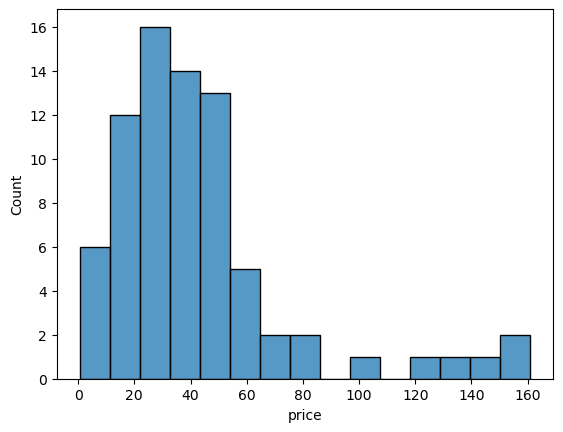

In [23]:
sns.histplot(hirank)

In [24]:
hirank.mean()

42.54710526315787

In [25]:
lowrank=train[train['rank']==0]['price']

In [26]:
train[train['rank']==0]['price'].var()

8125.636093228698

<AxesSubplot:xlabel='price', ylabel='Count'>

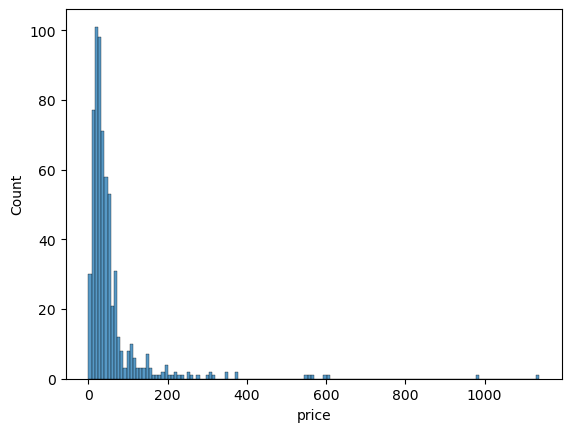

In [27]:
sns.histplot(lowrank)

In [28]:
lowrank.mean()

56.44161552500016

In [29]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-2.674782496465062, pvalue=0.9960091240750775)

In [30]:
stats.ttest_ind(hirank, lowrank, alternative='less', equal_var=False)

Ttest_indResult(statistic=-2.674782496465062, pvalue=0.003990875924922544)

* pvalue indicates that high rated games have a significantlly lower price than other games
* this actually is the opposite result of the initial question
* mean price difference is ~14$

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Is the msrp of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average msrp of higher rated games and other games</dd>
        <dd>- $H_a$: The average msrp of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [31]:
hirank=train[train['rank']==1]['msrp']

In [32]:
hirank.var()

634.5115428070175

<AxesSubplot:xlabel='msrp', ylabel='Count'>

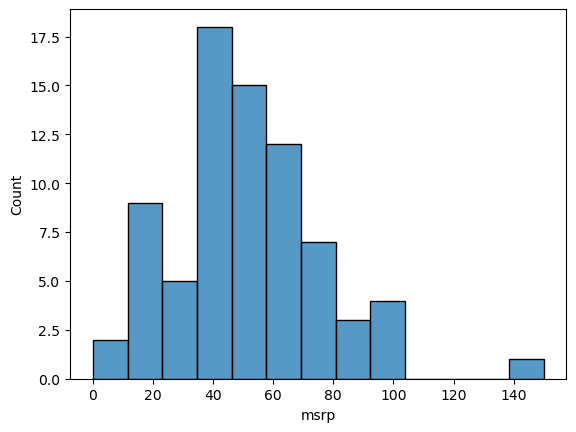

In [33]:
sns.histplot(hirank)

In [34]:
lowrank=train[train['rank']==0]['msrp']

In [35]:
lowrank.var()

1194.1851720647492

<AxesSubplot:xlabel='msrp', ylabel='Count'>

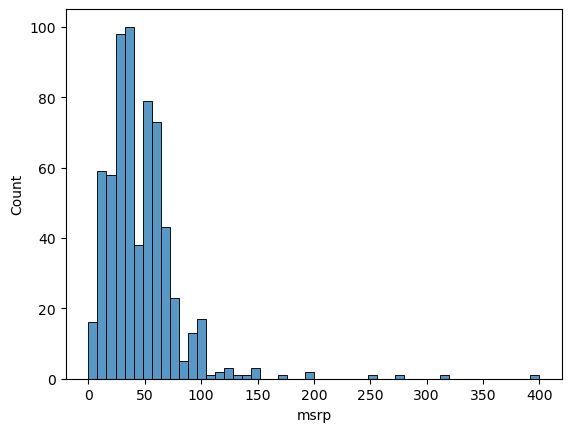

In [36]:
sns.histplot(lowrank)

In [37]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=1.3911842656628044, pvalue=0.0834682122710838)

* pvalue is not lower than the alpha
* overall msrp is not a good indicator of a top rated game

In [38]:
train.head()

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
386,Bruges,45.456444,41.49,2013.0,2.0,4.0,60.0,75.0,10.0,139,3.498201,0,0.0,0.0,0,0,0
623,Atlantis Rising (second edition),48.000000,65.00,2022.0,1.0,4.0,45.0,90.0,10.0,34,3.959559,0,0.0,0.0,0,0,0
781,Bus,235.400000,89.99,1999.0,3.0,5.0,120.0,120.0,14.0,40,3.743750,0,0.0,0.0,0,0,1
105,Bohnanza,28.000000,19.95,1997.0,2.0,7.0,45.0,60.0,13.0,371,3.426649,2,2.0,2.5,0,0,4
808,Flip Ships,43.824000,40.00,2017.0,1.0,4.0,30.0,45.0,8.0,54,3.479847,0,0.0,0.0,0,0,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Is the average user rating of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average user rating of higher rated games and other games</dd>
        <dd>- $H_a$: The average user rating of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [39]:
hirank=train[train['rank']==1]['average_user_rating']

In [40]:
hirank.var()

0.0631914901300298

<AxesSubplot:xlabel='average_user_rating', ylabel='Count'>

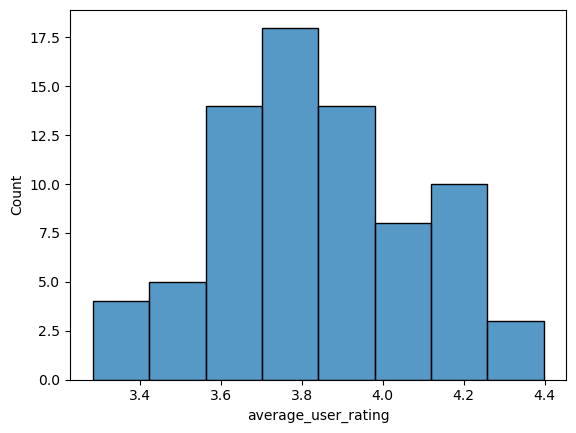

In [41]:
sns.histplot(hirank)

In [42]:
lowrank= train[train['rank']==0]['average_user_rating']

In [43]:
lowrank.var()

0.09776831335440073

<AxesSubplot:xlabel='average_user_rating', ylabel='Count'>

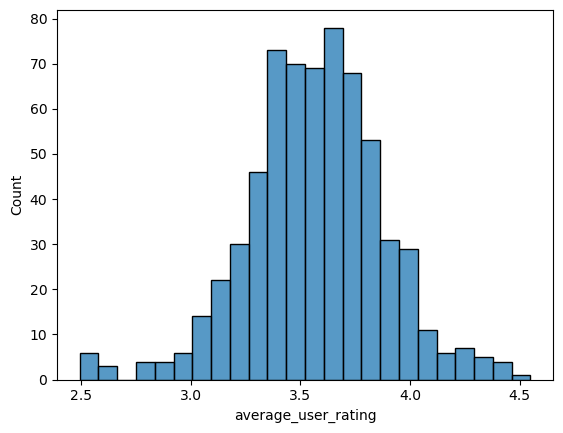

In [44]:
sns.histplot(lowrank)

In [45]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=8.37120932004523, pvalue=1.3589589718655607e-13)

In [46]:
hirank.mean(), lowrank.mean()

(3.829409758058103, 3.5667844994787146)

* the pvalue is lower than the alpha so we can reject the null hypothesis
* even though the pvalue indicates significance, the difference in the averages is only ~0.3 which is not very much
* this also can not be taken to modeling, because you won't know the average user rating until after the game is made. The model will aim to tell if a game will reach a high rank before it is released.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Is the min_players of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_players of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_players of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [47]:
hirank=train[train['rank']==1]['min_players']

In [48]:
hirank.var()

0.2856140350877192

<AxesSubplot:xlabel='min_players', ylabel='Count'>

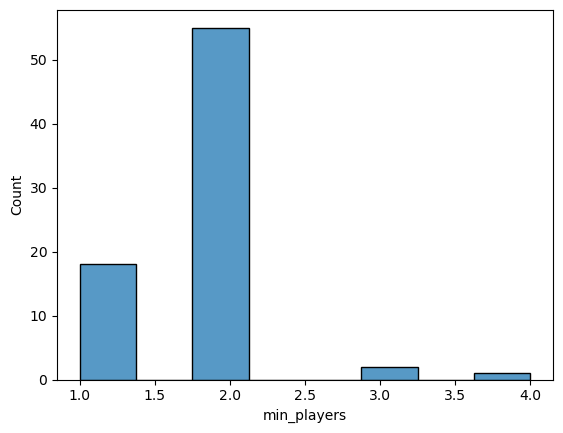

In [49]:
sns.histplot(hirank)

In [50]:
lowrank=train[train['rank']==0]['min_players']

In [51]:
lowrank.var()

0.53012275039124

<AxesSubplot:xlabel='min_players', ylabel='Count'>

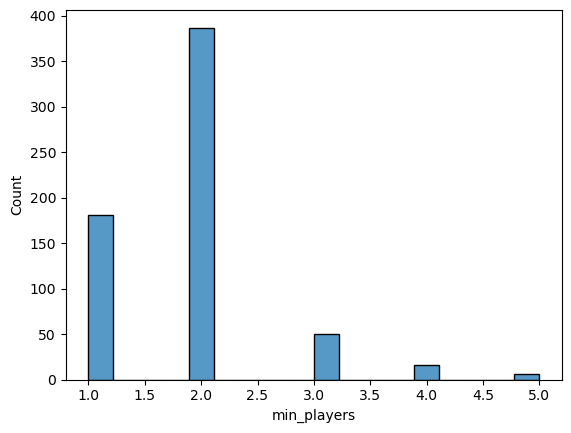

In [52]:
sns.histplot(lowrank)

In [53]:
stats.ttest_ind(hirank, lowrank, alternative='less', equal_var=False)

Ttest_indResult(statistic=-0.8512334048505296, pvalue=0.19823559163700116)

In [54]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-0.8512334048505296, pvalue=0.8017644083629989)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_players is not a significant driver of rank

In [55]:
train.head(5)

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
386,Bruges,45.456444,41.49,2013.0,2.0,4.0,60.0,75.0,10.0,139,3.498201,0,0.0,0.0,0,0,0
623,Atlantis Rising (second edition),48.000000,65.00,2022.0,1.0,4.0,45.0,90.0,10.0,34,3.959559,0,0.0,0.0,0,0,0
781,Bus,235.400000,89.99,1999.0,3.0,5.0,120.0,120.0,14.0,40,3.743750,0,0.0,0.0,0,0,1
105,Bohnanza,28.000000,19.95,1997.0,2.0,7.0,45.0,60.0,13.0,371,3.426649,2,2.0,2.5,0,0,4
808,Flip Ships,43.824000,40.00,2017.0,1.0,4.0,30.0,45.0,8.0,54,3.479847,0,0.0,0.0,0,0,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>Is the max_players of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average max_players of higher rated games and other games</dd>
        <dd>- $H_a$: The average max_players of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [56]:
hirank=train[train['rank']==1]['max_players']

In [57]:
hirank.var()

121.9480701754385

<AxesSubplot:xlabel='max_players', ylabel='Count'>

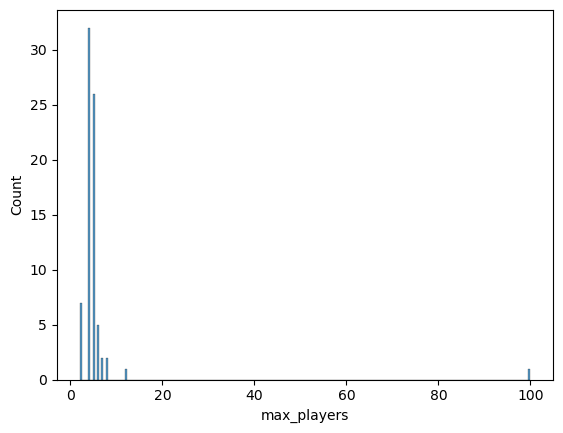

In [58]:
sns.histplot(hirank)

In [63]:
train[train['max_players']>50]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
406,Zombie Dice,8.99,13.13,2010.0,2.0,99.0,12.0,20.0,10.0,215,2.816412,0,0.00,0.000000,0,0,5
39,Welcome to...,19.49,29.95,2018.0,1.0,100.0,25.0,30.0,10.0,351,3.804822,6,2.00,2.666667,1,0,6
112,Cartographers: A Roll Player Tale,17.19,24.95,2019.0,1.0,100.0,30.0,45.0,10.0,190,4.034132,4,1.75,2.500000,0,0,8
642,SET,11.99,12.99,1988.0,1.0,99.0,30.0,30.0,6.0,134,2.962313,1,1.00,1.000000,0,0,0


In [64]:
lowrank=train[train['rank']==0]['max_players']

In [65]:
lowrank.var()

46.92272838419377

<AxesSubplot:xlabel='max_players', ylabel='Count'>

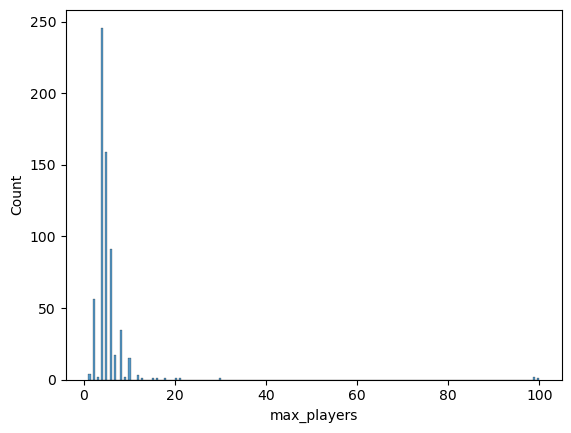

In [66]:
sns.histplot(lowrank)

In [69]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=0.3111490835683894, pvalue=0.378238503578918)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* similar to min_players, max_players is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 6:</h2>
    </header>
    <dl>
        <dt>Is the min_playtime of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_playtime of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_playtime of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [70]:
hirank=train[train['rank']==1]['min_playtime']

In [71]:
hirank.var()

1149.508771929825

<AxesSubplot:xlabel='min_playtime', ylabel='Count'>

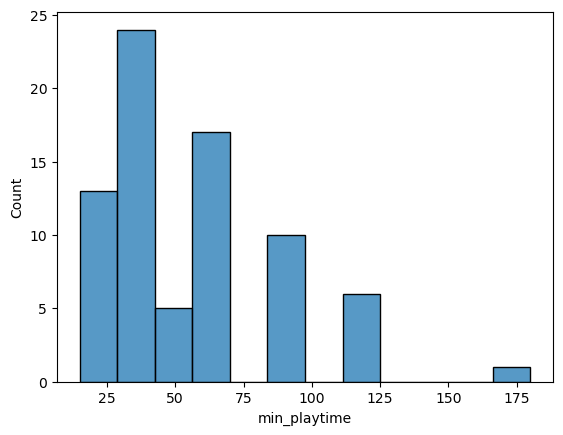

In [72]:
sns.histplot(hirank)

In [73]:
lowrank=train[train['rank']==0]['min_playtime']

In [74]:
lowrank.var()

1517.6717502934346

<AxesSubplot:xlabel='min_playtime', ylabel='Count'>

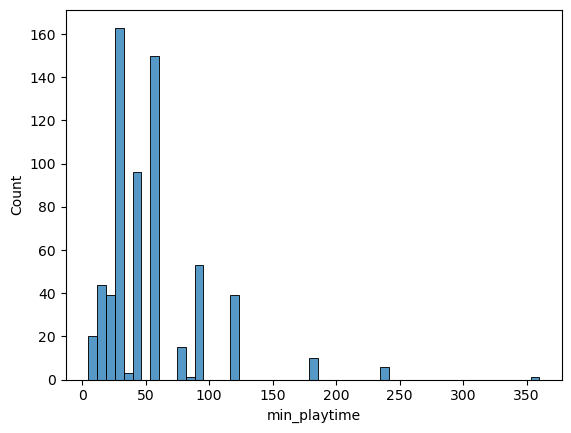

In [75]:
sns.histplot(lowrank)

In [78]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=-0.10326335477887541, pvalue=0.5411085224847587)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_playtime is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 7:</h2>
    </header>
    <dl>
        <dt>Is the max_playtime of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average max_playtime of higher rated games and other games</dd>
        <dd>- $H_a$: The average max_playtime of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [79]:
hirank=train[train['rank']==1]['max_playtime']

In [80]:
hirank.var()

3011.982280701755

<AxesSubplot:xlabel='max_playtime', ylabel='Count'>

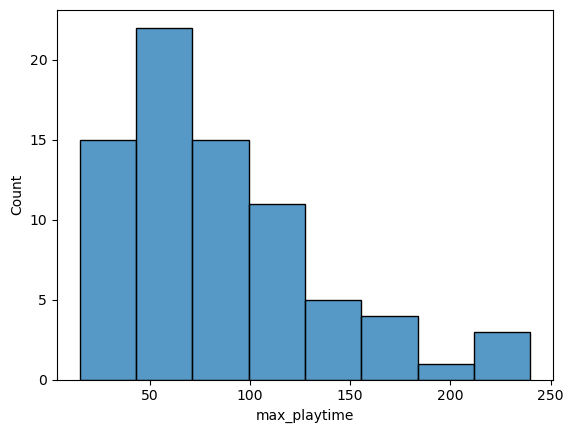

In [81]:
sns.histplot(hirank)

In [82]:
lowrank=train[train['rank']==0]['max_playtime']

In [83]:
lowrank.var()

4528.1552327855625

<AxesSubplot:xlabel='max_playtime', ylabel='Count'>

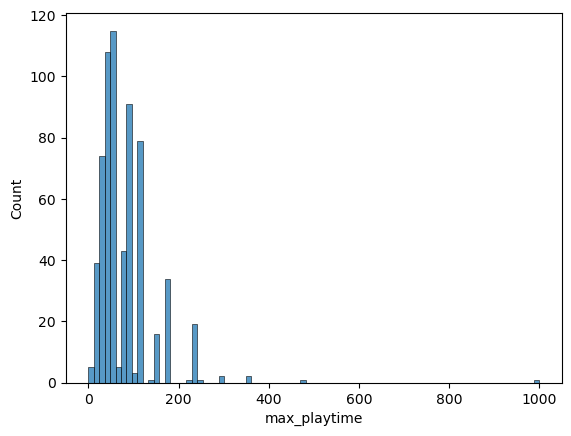

In [84]:
sns.histplot(lowrank)

In [87]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=0.7563281649461554, pvalue=0.22558295915180981)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* max_playtime is not a significant driver of rank

In [88]:
train.head()

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
386,Bruges,45.456444,41.49,2013.0,2.0,4.0,60.0,75.0,10.0,139,3.498201,0,0.0,0.0,0,0,0
623,Atlantis Rising (second edition),48.000000,65.00,2022.0,1.0,4.0,45.0,90.0,10.0,34,3.959559,0,0.0,0.0,0,0,0
781,Bus,235.400000,89.99,1999.0,3.0,5.0,120.0,120.0,14.0,40,3.743750,0,0.0,0.0,0,0,1
105,Bohnanza,28.000000,19.95,1997.0,2.0,7.0,45.0,60.0,13.0,371,3.426649,2,2.0,2.5,0,0,4
808,Flip Ships,43.824000,40.00,2017.0,1.0,4.0,30.0,45.0,8.0,54,3.479847,0,0.0,0.0,0,0,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 8:</h2>
    </header>
    <dl>
        <dt>Is the min_age of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_age of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_age of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [89]:
hirank=train[train['rank']==1]['min_age']

In [90]:
hirank.var()

4.822456140350878

<AxesSubplot:xlabel='min_age', ylabel='Count'>

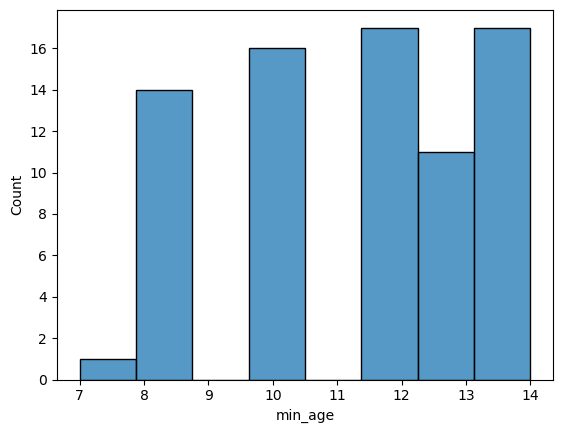

In [91]:
sns.histplot(hirank)

In [92]:
lowrank=train[train['rank']==0]['min_age']

In [93]:
lowrank.var()

5.690823063380294

<AxesSubplot:xlabel='min_age', ylabel='Count'>

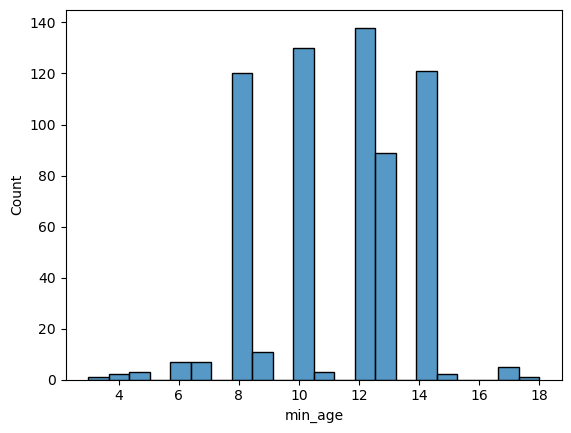

In [94]:
sns.histplot(lowrank)

In [97]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=0.6900247722549727, pvalue=0.24520141265934886)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_age is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 9:</h2>
    </header>
    <dl>
        <dt>Is the num_distributors of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average num_distributors of higher rated games and other games</dd>
        <dd>- $H_a$: The average num_distributors of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [98]:
hirank=train[train['rank']==1]['num_distributors']

In [99]:
hirank.var()

6.426666666666667

<AxesSubplot:xlabel='num_distributors', ylabel='Count'>

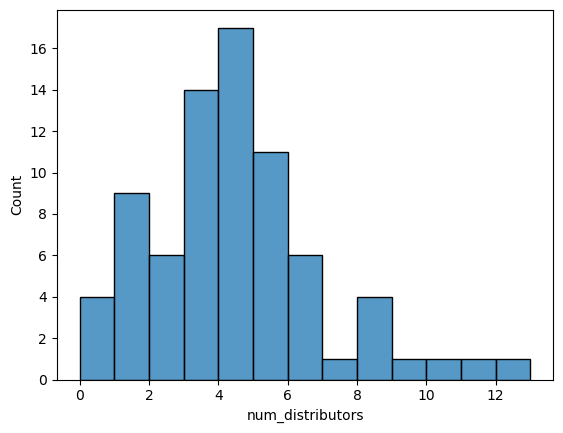

In [100]:
sns.histplot(hirank)

In [101]:
lowrank=train[train['rank']==0]['num_distributors']

In [102]:
lowrank.var()

4.561023082942098

<AxesSubplot:xlabel='num_distributors', ylabel='Count'>

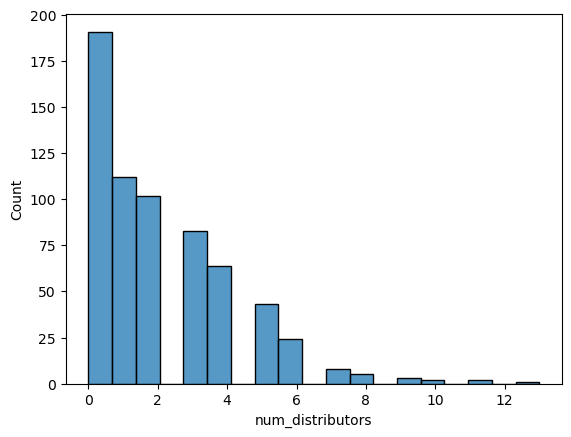

In [103]:
sns.histplot(lowrank)

In [104]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=7.0973865909179885, pvalue=1.5364921060137039e-12)

* the pvalue is lower than the alpha so we reject the null hypothesis
* number of distributors is a driver of rank.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 10:</h2>
    </header>
    <dl>
        <dt>Is the year_published of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average year_published of higher rated games and other games</dd>
        <dd>- $H_a$: The average year_published of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [105]:
hirank=train[train['rank']==1]['year_published']

In [106]:
hirank.var()

24.000526315789497

<AxesSubplot:xlabel='year_published', ylabel='Count'>

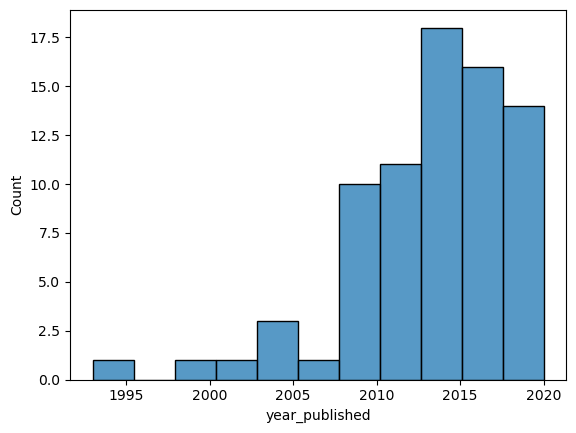

In [107]:
sns.histplot(hirank)

In [108]:
lowrank=train[train['rank']==0]['year_published']

In [109]:
lowrank.var()

1638.9000000000026

<AxesSubplot:xlabel='year_published', ylabel='Count'>

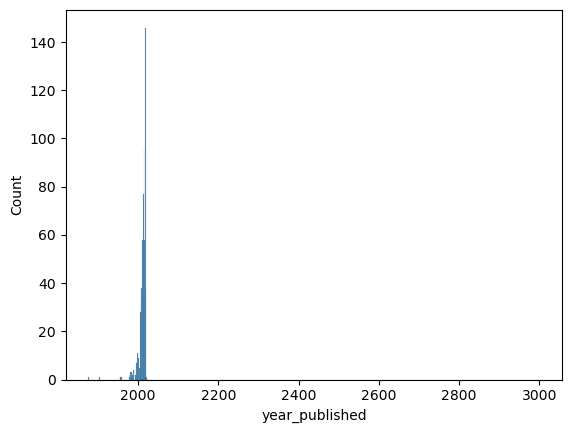

In [110]:
sns.histplot(lowrank)

In [111]:
train[train['year_published']>2022]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
616,Backgammon,5.29,5.99,3000.0,2.0,2.0,30.0,30.0,8.0,124,3.077471,3,2.0,2.666667,0,0,1


In [116]:
for i, row in df.iterrows():
    if row['year_published']==3000:
        df.loc[i, 'year_published'] = (-3000)

In [117]:
train, val, test= ex.tts(df, 'rank')

In [120]:
train[train['year_published']<0]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
616,Backgammon,5.29,5.99,-3000.0,2.0,2.0,30.0,30.0,8.0,124,3.077471,3,2.0,2.666667,0,0,1


In [121]:
lowrank=train[train['rank']==0]['year_published']

In [122]:
lowrank.var()

39233.6874456287

<AxesSubplot:xlabel='year_published', ylabel='Count'>

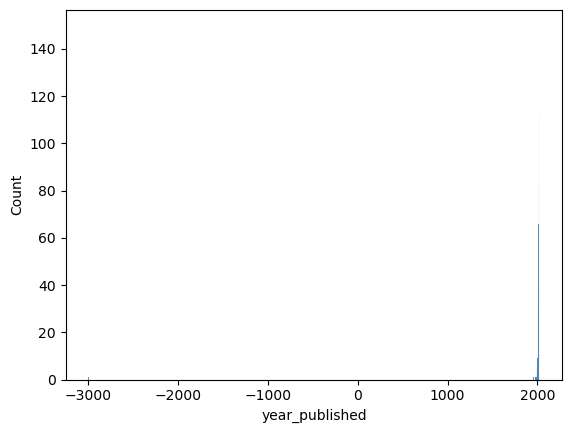

In [123]:
sns.histplot(lowrank)

In [126]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=1.2725850931975102, pvalue=0.10181104312601662)

* year_published is not an indicator of if a game is higher rated or not

In [127]:
train[train['rank']==1]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
29,King of Tokyo,28.49,42.99,2011.0,2.0,6.0,30.0,36.0,8.0,665,3.529429,8,1.5,2.125000,1,0,3
96,The Mind,10.00,12.99,2018.0,1.0,4.0,20.0,30.0,10.0,377,3.456943,1,1.0,4.000000,1,0,3
23,Race for the Galaxy,24.69,34.95,2007.0,2.0,4.0,30.0,60.0,14.0,482,3.817432,2,3.5,4.000000,1,0,6
101,Onitama,21.79,29.99,2014.0,2.0,2.0,15.0,30.0,8.0,333,3.604272,2,1.5,2.500000,1,0,1
97,Arboretum,15.09,20.00,2015.0,2.0,4.0,30.0,45.0,8.0,318,3.632183,1,2.0,3.000000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Gaia Project,75.99,99.95,2017.0,1.0,4.0,60.0,150.0,14.0,189,4.152593,3,4.0,4.333333,1,0,3
102,Isle of Skye: From Chieftain to King,30.99,39.99,2015.0,2.0,5.0,30.0,45.0,8.0,330,3.636818,0,0.0,0.000000,1,0,4
56,Raiders of the North Sea,43.50,55.00,2015.0,2.0,4.0,60.0,120.0,12.0,295,3.915957,2,3.0,3.000000,1,0,3
79,Paladins of the West Kingdom,36.52,55.00,2019.0,1.0,4.0,90.0,120.0,12.0,138,4.166286,5,4.0,3.800000,1,0,3
